In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
dataset = pd.read_csv('Social_Network_Ads.csv')  

In [5]:
X = dataset[['Age', 'EstimatedSalary']]
y = dataset['Purchased']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [7]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)


In [8]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='rbf', probability=True),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', random_state=0),
    'Random Forest': RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
}

In [9]:
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    results[name] = acc


Logistic Regression
[[65  3]
 [ 8 24]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100


K-Nearest Neighbors
[[64  4]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100


SVM
[[64  4]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92 

In [10]:
print("\nModel Accuracies:")
for name, acc in results.items():
    print(f"{name}: {acc:.2f}")


Model Accuracies:
Logistic Regression: 0.89
K-Nearest Neighbors: 0.93
SVM: 0.93
Decision Tree: 0.91
Random Forest: 0.91


C:\Users\vadan\AppData\Local\Temp\ipykernel_25980\787517848.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y == j, 0], X_set[y == j, 1],


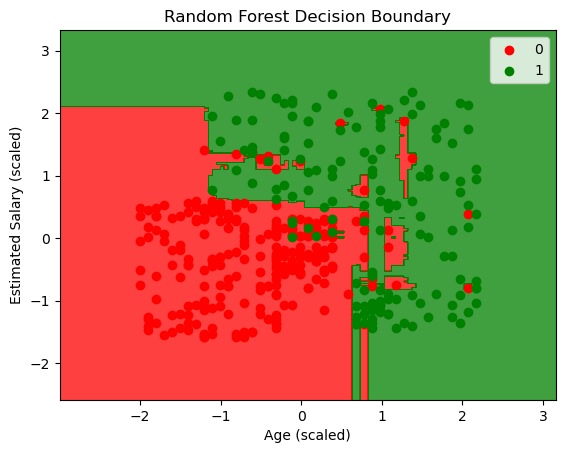

In [11]:
best_model = models['Random Forest']
from matplotlib.colors import ListedColormap

X_set, y_set = sc.transform(X), y
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)
plt.contourf(X1, X2, best_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y)):
    plt.scatter(X_set[y == j, 0], X_set[y == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Random Forest Decision Boundary')
plt.xlabel('Age (scaled)')
plt.ylabel('Estimated Salary (scaled)')
plt.legend()
plt.show()

In [12]:
custom_inputs = [
    [30, 87000],
    [40, 0],
    [40, 100000],
    [50, 0],
    [18, 0],
    [22, 600000],
    [35, 2500000],
    [60, 100000000]
]
custom_inputs_scaled = sc.transform(custom_inputs)
custom_predictions = best_model.predict(custom_inputs_scaled)

print("\nCustom Predictions:")
for i, (inp, pred) in enumerate(zip(custom_inputs, custom_predictions)):
    print(f"Input {i+1} - Age: {inp[0]}, Salary: {inp[1]} -> {'Purchased' if pred == 1 else 'Not Purchased'}")


Custom Predictions:
Input 1 - Age: 30, Salary: 87000 -> Not Purchased
Input 2 - Age: 40, Salary: 0 -> Not Purchased
Input 3 - Age: 40, Salary: 100000 -> Purchased
Input 4 - Age: 50, Salary: 0 -> Purchased
Input 5 - Age: 18, Salary: 0 -> Not Purchased
Input 6 - Age: 22, Salary: 600000 -> Purchased
Input 7 - Age: 35, Salary: 2500000 -> Purchased
Input 8 - Age: 60, Salary: 100000000 -> Purchased


C:\Users\vadan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [13]:
print("\nHypothesis Testing:")
test_cases = [
    {'age': 22, 'salary': 600000, 'hypothesis': 'Young + High Salary'},
    {'age': 50, 'salary': 0, 'hypothesis': 'Old + No Salary'},
    {'age': 35, 'salary': 2500000, 'hypothesis': 'Mid Age + High Salary'},
    {'age': 18, 'salary': 0, 'hypothesis': 'Very Young + No Salary'}
]

for case in test_cases:
    scaled = sc.transform([[case['age'], case['salary']]])
    pred = best_model.predict(scaled)[0]
    print(f"{case['hypothesis']} → Prediction: {'Purchased' if pred == 1 else 'Not Purchased'}")


Hypothesis Testing:
Young + High Salary → Prediction: Purchased
Old + No Salary → Prediction: Purchased
Mid Age + High Salary → Prediction: Purchased
Very Young + No Salary → Prediction: Not Purchased


C:\Users\vadan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vadan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vadan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vadan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [19]:
input_data = np.array([
    [30, 87000],
    [40, 0],
    [40, 100000],
    [50, 0]
])
predictions = best_model.predict(sc.transform(input_data))


C:\Users\vadan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [20]:
input_data_2 = np.array([
    [18, 0],
    [22, 600000],
    [35, 2500000],
    [60, 100000000]
])
predictions_2 = best_model.predict(sc.transform(input_data_2))


C:\Users\vadan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [21]:
group1 = pd.DataFrame([
    [30, 87000],
    [40, 0],
    [40, 100000],
    [50, 0]
], columns=['Age', 'EstimatedSalary'])

group1_scaled = sc.transform(group1)
predictions1 = model.predict(group1_scaled)

print("Predictions for Group 1:")
for i, pred in enumerate(predictions1):
    print(f"Age: {group1.iloc[i, 0]}, Salary: {group1.iloc[i, 1]:,.0f} => Prediction: {'Buys Insurance' if pred == 1 else 'Does NOT Buy Insurance'}")

Predictions for Group 1:
Age: 30, Salary: 87,000 => Prediction: Does NOT Buy Insurance
Age: 40, Salary: 0 => Prediction: Does NOT Buy Insurance
Age: 40, Salary: 100,000 => Prediction: Buys Insurance
Age: 50, Salary: 0 => Prediction: Buys Insurance


In [22]:
group2 = pd.DataFrame([
    [18, 0],
    [22, 600000],
    [35, 2500000],
    [60, 100000000]
], columns=['Age', 'EstimatedSalary'])

group2_scaled = sc.transform(group2)
predictions2 = model.predict(group2_scaled)

print("\nPredictions for Group 2:")
for i, pred in enumerate(predictions2):
    print(f"Age: {group2.iloc[i, 0]}, Salary: {group2.iloc[i, 1]:,.0f} => Prediction: {'Buys Insurance' if pred == 1 else 'Does NOT Buy Insurance'}")


Predictions for Group 2:
Age: 18, Salary: 0 => Prediction: Does NOT Buy Insurance
Age: 22, Salary: 600,000 => Prediction: Buys Insurance
Age: 35, Salary: 2,500,000 => Prediction: Buys Insurance
Age: 60, Salary: 100,000,000 => Prediction: Buys Insurance


In [24]:

# Function to test hypothesis on a grid of Age and Salary
def test_hypotheses(model, scaler):
    test_data = []

    # Vary age and fix high salary (to test H1)
    for age in range(18, 61, 5):
        test_data.append([age, 500000])

    # Vary age and fix low salary (to test H2)
    for age in range(18, 61, 5):
        test_data.append([age, 10000])

    # Fix age and vary salary (to test H3)
    for salary in range(10000, 1000001, 100000):
        test_data.append([30, salary])

    test_df = pd.DataFrame(test_data, columns=['Age', 'EstimatedSalary'])
    test_scaled = scaler.transform(test_df)
    predictions = model.predict(test_scaled)

    print("\n=== Hypothesis Testing Results ===")
    for i, pred in enumerate(predictions):
        print(f"Age: {test_df.iloc[i, 0]}, Salary: {test_df.iloc[i, 1]:,.0f} => {'Buys Insurance' if pred == 1 else 'Does NOT Buy Insurance'}")

# Run the test
test_hypotheses(model, sc)



=== Hypothesis Testing Results ===
Age: 18, Salary: 500,000 => Buys Insurance
Age: 23, Salary: 500,000 => Buys Insurance
Age: 28, Salary: 500,000 => Buys Insurance
Age: 33, Salary: 500,000 => Buys Insurance
Age: 38, Salary: 500,000 => Buys Insurance
Age: 43, Salary: 500,000 => Buys Insurance
Age: 48, Salary: 500,000 => Buys Insurance
Age: 53, Salary: 500,000 => Buys Insurance
Age: 58, Salary: 500,000 => Buys Insurance
Age: 18, Salary: 10,000 => Does NOT Buy Insurance
Age: 23, Salary: 10,000 => Does NOT Buy Insurance
Age: 28, Salary: 10,000 => Does NOT Buy Insurance
Age: 33, Salary: 10,000 => Does NOT Buy Insurance
Age: 38, Salary: 10,000 => Does NOT Buy Insurance
Age: 43, Salary: 10,000 => Does NOT Buy Insurance
Age: 48, Salary: 10,000 => Buys Insurance
Age: 53, Salary: 10,000 => Buys Insurance
Age: 58, Salary: 10,000 => Buys Insurance
Age: 30, Salary: 10,000 => Does NOT Buy Insurance
Age: 30, Salary: 110,000 => Buys Insurance
Age: 30, Salary: 210,000 => Buys Insurance
Age: 30, Salary

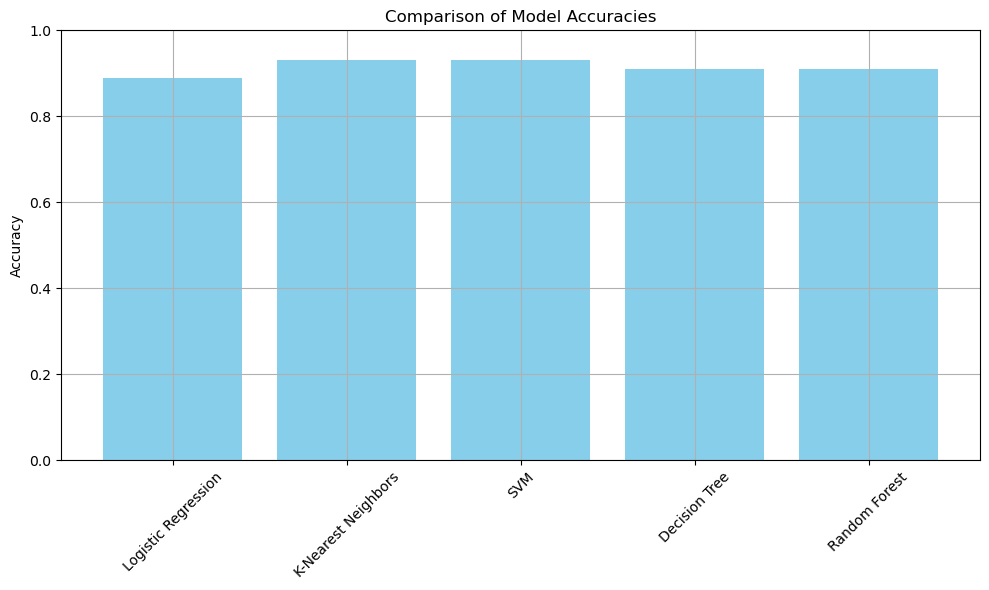

In [25]:
# Add this to your code
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()


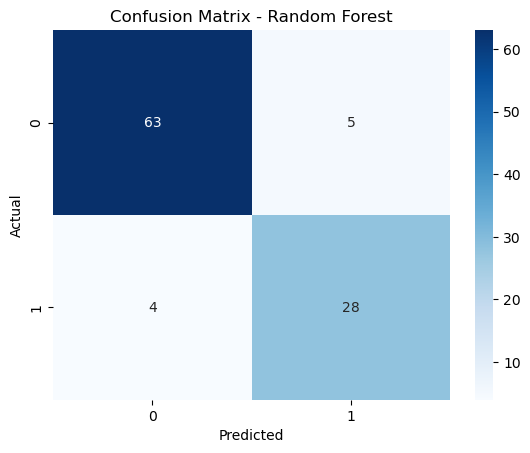

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# For best model (e.g., Random Forest)
y_pred_best = best_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()
